In [1]:
import numpy  as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse

import matplotlib.pyplot as plt
%matplotlib inline

import json
import urllib

# titanic dataset
import seaborn as sns

# 비정형 데이터 처리를 위한 라이브러리
from bs4 import BeautifulSoup
import requests
import re



print('numpy  version - ' , np.__version__)
print('pandas version - ' , pd.__version__)

numpy  version -  1.20.3
pandas version -  1.3.4


In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

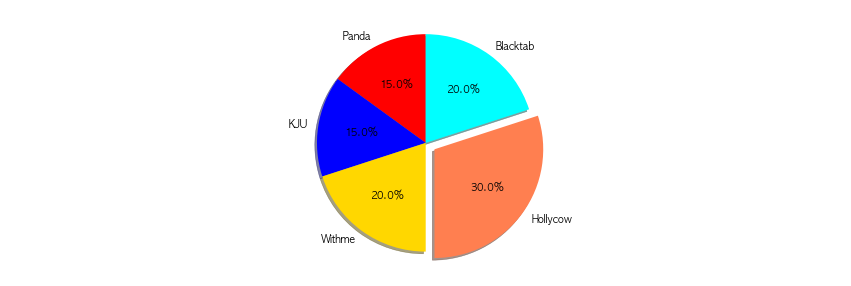

In [3]:
datas = [15, 15, 20, 30, 20]
labels = ['Panda','KJU','Withme', 'Hollycow', 'Blacktab']
colors = ['red', 'blue', 'gold', 'coral', 'cyan']

plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.axis('equal')

explode = (0,0,0,0.1,0)

plt.pie(datas, labels = labels, colors = colors, shadow = True, autopct = '%1.1f%%',
       startangle = 90, explode = explode)



plt.show()
plt.close()


In [5]:
auto_frm = pd.read_csv('/Users/choijaewoo/visualization_data/auto-mpg.csv', header = None)

auto_frm.columns= ['mpg', 'cylinders','displacement', 'horsepower', 'weight', 'accelaration', 'model year', 'origin', 'name']

auto_frm



,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [6]:
auto_frm['cnt'] = 1
auto_frm

,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,origin,name,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [7]:
print('제조국으로 그룹을 지어서 라벨인덱스 변경 - ')
print('1-> USA , 2->KOR, 3-> EU')

# auto_frm['origin'].unique()

origin_grp = auto_frm.groupby('origin').sum()
origin_grp.index=['USA', 'KOR', 'EU']
origin_grp


제조국으로 그룹을 지어서 라벨인덱스 변경 - 
1-> USA , 2->KOR, 3-> EU


,mpg,cylinders,displacement,weight,accelaration,model year,cnt
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
KOR,1952.4,291,7640.0,169631.0,1175.1,5307,70
EU,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [8]:
print('제조국으로 그룹을 지어서 라벨인덱스 변경 - ')
print('8 -> cyl8 , 4 ->cyl4, 3 -> cyl3')

cylin_grp = auto_frm.groupby('cylinders').sum()
cylin_grp.index =['cyl3','cyl4', 'cyl5','cyl6','cyl8']
cylin_grp

제조국으로 그룹을 지어서 라벨인덱스 변경 - 
8 -> cyl8 , 4 ->cyl4, 3 -> cyl3


,mpg,displacement,weight,accelaration,model year,origin,cnt
cyl3,82.2,290.0,9594.0,53.0,302,12,4
cyl4,5974.5,22398.5,470858.0,3386.7,15723,405,204
cyl5,82.1,435.0,9310.0,55.9,237,6,3
cyl6,1678.8,18324.0,268651.0,1366.1,6378,100,84
cyl8,1541.2,35536.0,423816.0,1334.4,7612,103,103


요구사항 - 
제조국별 차량 생산량을 파이차트로 한다면 - 


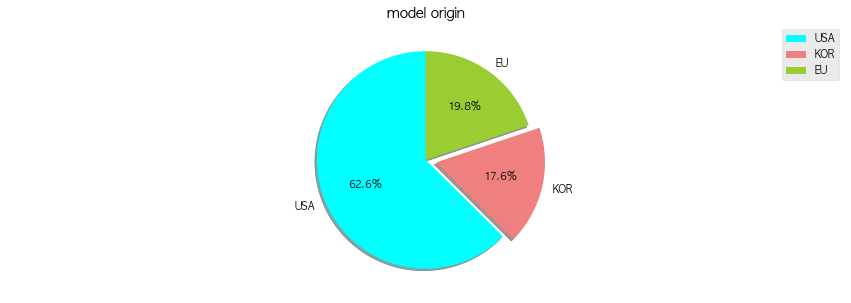

In [9]:
print('요구사항 - ')
print('제조국별 차량 생산량을 파이차트로 한다면 - ')

plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.axis('equal')

explode = (0,0.1,0)
colors = ['cyan', 'lightcoral','yellowgreen']
plt.pie(origin_grp['cnt'],
        labels = origin_grp.index,
        colors = colors,
        shadow = True,
        autopct = '%1.1f%%',
       startangle = 90,
       explode = explode)


plt.title('model origin')
plt.legend(labels = origin_grp.index, loc = 'best')

plt.show()
plt.close()